In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from pandas.tseries.offsets import DateOffset
import edhec_risk_kit as erk

,Date,N_Q1,N_Q2,N_Q3,N_Q4,N_Q5,Universe_x,N_hf_returns,N_Cum_Ret_Q1,N_Cum_Ret_Q2,...,S_Cum_Ret_Q2,S_Cum_Ret_Q3,S_Cum_Ret_Q4,S_Cum_Ret_Q5,Cum_Ret_Universe_y,S_Cum_Ret_hf,SNS_hf_ret,SNS_hf_cum_ret,SNS120_20,SNS_120_cum_ret
0,2006-01-31,-0.811333,-1.667143,0.403125,2.502308,2.646667,0.503286,3.458000,-0.008113,-0.016671,...,0.125342,0.212266,0.093788,0.221809,0.150082,0.094167,4.307048,0.043070,4.357124,0.043571
1,2006-02-28,8.594444,4.506667,7.737000,5.258000,9.030833,6.999608,0.436389,0.077134,0.027644,...,0.201579,0.298115,0.149484,0.326299,0.230583,0.115177,-0.042444,0.042628,8.543511,0.132729
2,2006-03-31,0.900000,2.641333,5.151000,3.617143,2.997000,3.072400,2.097000,0.086828,0.054787,...,0.256961,0.329817,0.221872,0.373117,0.268391,0.173250,2.630000,0.070049,4.056000,0.178672
3,2006-04-30,-0.636667,-0.226667,-1.278889,1.855000,-4.720909,-1.228800,-4.084242,0.079909,0.052397,...,0.271851,0.301858,0.237635,0.298313,0.252805,0.133117,-4.811111,0.018568,-6.410000,0.103119
4,2006-05-31,4.105333,-1.220769,-1.671817,-0.329167,0.569167,0.321190,-3.536167,0.124242,0.039549,...,0.284943,0.309318,0.222326,0.309014,0.259396,0.127274,-3.281048,-0.014852,0.168076,0.104974


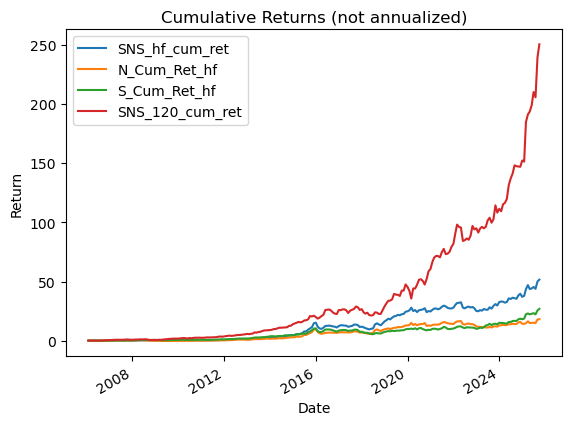

In [27]:
# Combine Neg Sel and Sentiment quintile performance into a single dataframe
Neg_Sel_Score = pd.read_csv(r"C:\Users\B420615\OneDrive - Standard Bank\Neg_Sel\Neg_Sel_Q_Scores_liquid.csv")
Sentiment_Score = pd.read_csv(r"C:\Users\B420615\OneDrive - Standard Bank\Neg_Sel\Sentiment_Q_Scores_liquid.csv")

SNS_Score = Neg_Sel_Score.merge(Sentiment_Score, on=['Date'],how='left')
SNS_Score = SNS_Score.sort_values(by=['Date'])
SNS_Score['Date'] = pd.to_datetime(SNS_Score['Date'])
SNS_Score['SNS_hf_ret'] = SNS_Score['S_Q5']-SNS_Score['N_Q1']
SNS_Score['SNS_hf_cum_ret'] = ((1+SNS_Score['SNS_hf_ret']/100).cumprod()-1)
SNS_Score['SNS120_20'] = 1.2*SNS_Score['S_Q5']-0.2*SNS_Score['N_Q1']
SNS_Score['SNS_120_cum_ret'] = ((1+SNS_Score['SNS120_20']/100).cumprod()-1)
# Graph returns of SNS vs hf scores for Neg_Sel and Sentiment

ax = SNS_Score.plot(xlabel='Date', ylabel='Return',x = 'Date', 
                    y = ['SNS_hf_cum_ret','N_Cum_Ret_hf','S_Cum_Ret_hf','SNS_120_cum_ret'])
ax.set_title('Cumulative Returns (not annualized)')

#Create a "liquid portfolio to eliminate illiquid stocks (defined by mkt cap). 
#Merge the liquidity filter dataframe and eliminate rows that do not meet liquidity requirements
#liquidity_filter = 0.25
#Jalsh_wts = pd.read_csv(rf'C:\Users\B420615.STANLIB\JalshWeightsBBG.csv')
#Jalsh_wts["Date"] = pd.to_datetime(Jalsh_wts["Date"])
#Jalsh_wts.rename(columns={'ID':'Ticker'},inplace=True)
#Jalsh_wts.head()


#SNS_Score_liquid = SNS_Score.merge(Jalsh_wts, on=['Date','Ticker'],how='left')
#SNS_Score_liquid.drop(SNS_Score_liquid[SNS_Score_liquid['id().weights'] < liquidity_filter].index, inplace = True)


output_file_path = rf'C:\Users\B420615\OneDrive - Standard Bank\Neg_Sel\SNS_Score.csv'
SNS_Score.to_csv(output_file_path, index=False)
SNS_Score.head()

In [28]:
SNS_Score.tail()

,Date,N_Q1,N_Q2,N_Q3,N_Q4,N_Q5,Universe_x,N_hf_returns,N_Cum_Ret_Q1,N_Cum_Ret_Q2,...,S_Cum_Ret_Q2,S_Cum_Ret_Q3,S_Cum_Ret_Q4,S_Cum_Ret_Q5,Cum_Ret_Universe_y,S_Cum_Ret_hf,SNS_hf_ret,SNS_hf_cum_ret,SNS120_20,SNS_120_cum_ret
232,2025-06-30,2.349091,-0.023000,1.376000,3.509333,3.425000,2.295000,1.075909,0.042634,3.628358,...,3.349875,13.951881,11.065409,111.706499,12.851072,23.294044,2.675576,45.401822,5.559782,209.970718
233,2025-07-31,1.944000,3.404167,1.592222,0.803333,0.218750,1.487458,-1.725250,0.062903,3.785915,...,3.433683,13.845509,11.518022,110.073865,13.057100,22.258250,-3.392571,43.827607,-2.127086,205.483190
234,2025-08-31,-0.122000,0.181538,-0.932222,-2.217273,18.650714,4.025789,18.772714,0.061606,3.794603,...,3.425702,14.424360,11.330431,125.149550,13.623010,25.578598,13.694667,49.966598,16.311600,239.163902
235,2025-09-30,0.848000,-0.431000,4.636667,5.820909,2.280714,2.627037,1.432714,0.070608,3.773939,...,3.487928,14.582923,12.193673,130.181235,14.007161,26.928640,3.140667,51.567289,4.616800,250.251789
236,2025-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
costs = 0.25
interest = 0.35
#calculate returns post costs & interest
SNS_Score['SNS_ret_net'] = (SNS_Score['SNS_hf_ret']-costs+interest)/100
SNS_Score['SNS_Cum_Ret_net'] = ((1+SNS_Score['SNS_ret_net']).cumprod()-1)
SNS_Score['SNS120_20_net'] = (SNS_Score['SNS120_20']-costs)/100
SNS_Score['SNS120_20_net_cum_ret'] = ((1+SNS_Score['SNS120_20_net']).cumprod()-1)

output_file_path = rf'C:\Users\B420615\OneDrive - Standard Bank\Neg_Sel\SNS_Score.csv'
SNS_Score.to_csv(output_file_path, index=False)
SNS_Score.head()

,Date,N_Q1,N_Q2,N_Q3,N_Q4,N_Q5,Universe_x,N_hf_returns,N_Cum_Ret_Q1,N_Cum_Ret_Q2,...,Cum_Ret_Universe_y,S_Cum_Ret_hf,SNS_hf_ret,SNS_hf_cum_ret,SNS120_20,SNS_120_cum_ret,SNS_ret_net,SNS_Cum_Ret_net,SNS120_20_net,SNS120_20_net_cum_ret
0,2006-01-31,-0.811333,-1.667143,0.403125,2.502308,2.646667,0.503286,3.458000,-0.008113,-0.016671,...,0.150082,0.094167,4.307048,0.043070,4.357124,0.043571,0.044070,0.044070,0.041071,0.041071
1,2006-02-28,8.594444,4.506667,7.737000,5.258000,9.030833,6.999608,0.436389,0.077134,0.027644,...,0.230583,0.115177,-0.042444,0.042628,8.543511,0.132729,0.000576,0.044671,0.082935,0.127413
2,2006-03-31,0.900000,2.641333,5.151000,3.617143,2.997000,3.072400,2.097000,0.086828,0.054787,...,0.268391,0.173250,2.630000,0.070049,4.056000,0.178672,0.027300,0.073191,0.038060,0.170322
3,2006-04-30,-0.636667,-0.226667,-1.278889,1.855000,-4.720909,-1.228800,-4.084242,0.079909,0.052397,...,0.252805,0.133117,-4.811111,0.018568,-6.410000,0.103119,-0.047111,0.022632,-0.066600,0.092378
4,2006-05-31,4.105333,-1.220769,-1.671817,-0.329167,0.569167,0.321190,-3.536167,0.124242,0.039549,...,0.259396,0.127274,-3.281048,-0.014852,0.168076,0.104974,-0.031810,-0.009899,-0.000819,0.091484


# SNS_Score.tail()

In [40]:
#Show annualised returns
last_row_series = ((1+(SNS_Score.iloc[-2][['SNS_Cum_Ret_net','N_Cum_Ret_hf','S_Cum_Ret_hf','SNS120_20_net_cum_ret']]))**(12/235)-1)*100
last_row_series
#fig,ax = plt.subplots(figsize = (8,3))
#returns = sns.barplot(y = last_row_series, color = sns.color_palette()[0],saturation=1.)

SNS_Cum_Ret_net          23.885228
N_Cum_Ret_hf             16.287081
S_Cum_Ret_hf             18.533427
SNS120_20_net_cum_ret    28.747742
Name: 235, dtype: object

In [49]:
def annual_compound_return(df, months):
    """
    Calculate the annual compound return (CAGR) for the last 'months' periods of monthly returns.
    
    Parameters:
    - df: DataFrame with a 'Monthly_Return' column representing periodic returns as decimal
    - months: Number of months over which to calculate the annualized compound return.
       
    """
    # Compound the returns over the selected period
    compound_return = (1 + df['SNS120_20_net'].tail(months)).prod() - 1
    # Annualize the compound return
    annual_return = (1 + compound_return) ** (12 / months) - 1
    return annual_return

# Calculate annual compound returns for different periods
periods = [6, 12, 36, 60,120,235]
results = {period: annual_compound_return(SNS_Score, period) for period in periods}
results = pd.DataFrame.from_dict(results, orient='index')
results.columns = (['Annualised Return (decimal)'])
results.index.name = 'Months'
print(results)

        Annualised Return (decimal)
Months                             
6                          0.630058
12                         0.652973
36                         0.330789
60                         0.325297
120                        0.239889
235                        0.279617


In [50]:
monthly_volatility = SNS_Score['SNS120_20_net'].std()
annual_volatility = monthly_volatility * np.sqrt(12)
print(annual_volatility)

0.20799407662604533


In [48]:
ir = results.iloc[5]/annual_volatility
ir

Annualised Return (decimal)    1.37129
Name: 230, dtype: float64

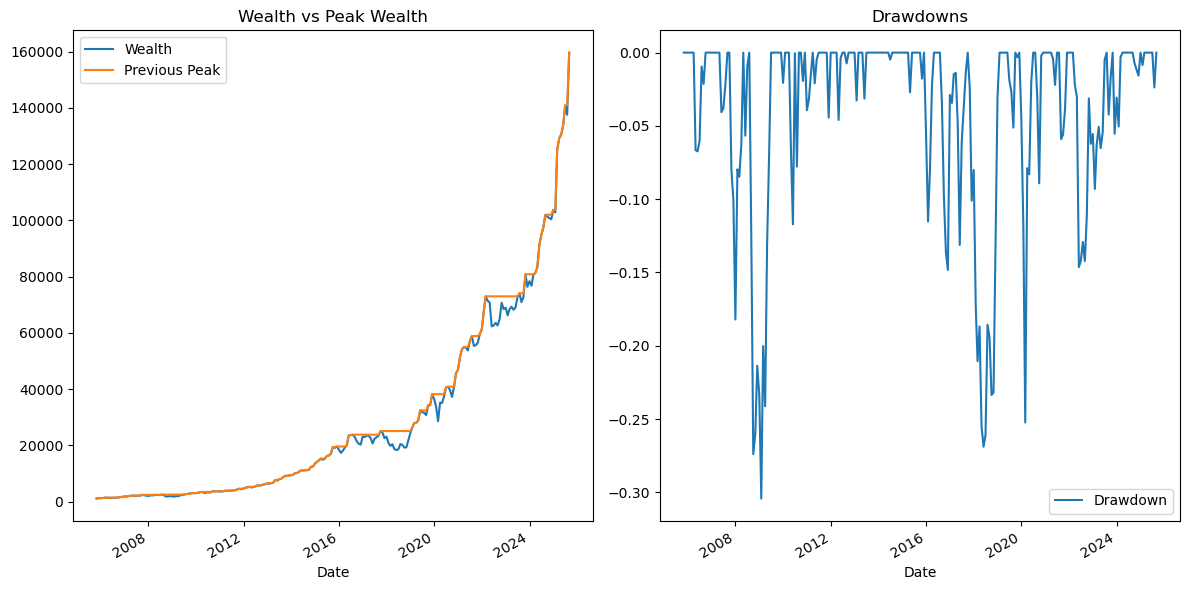

In [11]:
#Calculate drawdowns
Drawdowns = erk.drawdown(SNS_Score['SNS120_20_net'])
Drawdowns = pd.merge(Drawdowns, SNS_Score['Date'], left_index=True,right_index=True)
Drawdowns = Drawdowns.reindex(['Date', 'Wealth', 'Previous Peak','Drawdown'], axis=1)
Drawdowns

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
Drawdowns.plot(x='Date',y=['Wealth','Previous Peak'],ax=axes[0])
axes[0].set_title('Wealth vs Peak Wealth')

Drawdowns.plot(x='Date',y='Drawdown',ax=axes[1])
axes[1].set_title('Drawdowns')

plt.tight_layout()
plt.show()
                  
#ax = Drawdowns.plot(xlabel='Months', ylabel='Wealth',x='Date',y = ['Wealth','Previous Peak'])
#ax.set_title('Wealth vs Peak Wealth')

In [12]:
# Sharpe Ratio
erk.sharpe_ratio(SNS_Score['SNS120_20_net']/100, 0, 12)

np.float64(1.3393191531247597)

In [13]:
Neg_Sel_Ave = pd.read_csv(r"C:\Users\B420615\OneDrive - Standard Bank\Neg_Sel\Ave_returns_Neg_Sel.csv")
Sentiment_Ave = pd.read_csv(r"C:\Users\B420615\OneDrive - Standard Bank\Neg_Sel\Ave_returns_Sentiment.csv")
Ave_returns = Sentiment_Ave.merge(Neg_Sel_Ave,on=['Date'],how='left')
Ave_returns['SNS_hf_Stocks'] = Ave_returns['SNS_L_Stocks']+Ave_returns['SNS_S_Stocks']


In [14]:
Ave_returns.tail()

,Date,Universe_x,SNS_L_Stocks,Wins_x,ic_x,Rolling_ic_x,Universe_y,SNS_S_Stocks,Wins_y,ic_y,Rolling_ic_y,SNS_hf_Stocks
234,2025-05-31,0.944667,13,7,0.076923,0.039530,0.944667,12,8,0.333333,0.148627,25
235,2025-06-30,2.295000,15,10,0.333333,0.060897,2.295000,11,6,0.090909,0.170092,26
236,2025-07-31,1.487458,14,7,0.000000,0.048993,1.487458,10,3,-0.400000,0.150648,24
237,2025-08-31,4.025789,15,5,-0.333333,0.009310,4.025789,10,8,0.600000,0.200648,25
238,2025-09-30,NaN,15,0,-1.000000,-0.079579,NaN,11,0,-1.000000,0.100648,26


In [15]:
Ave_returns['SNS_hf_Wins'] = Ave_returns['Wins_x'] + Ave_returns['Wins_y']

In [16]:
Ave_returns['ic'] = (2*(Ave_returns['SNS_hf_Wins']/Ave_returns['SNS_hf_Stocks']))-1
Ave_returns['Rolling_ic'] = Ave_returns['ic'].rolling(window=12).mean()
Overall_ic = Ave_returns[0:-2]['ic'].mean(axis=0)


In [17]:
Overall_ic

np.float64(0.0743703633807929)

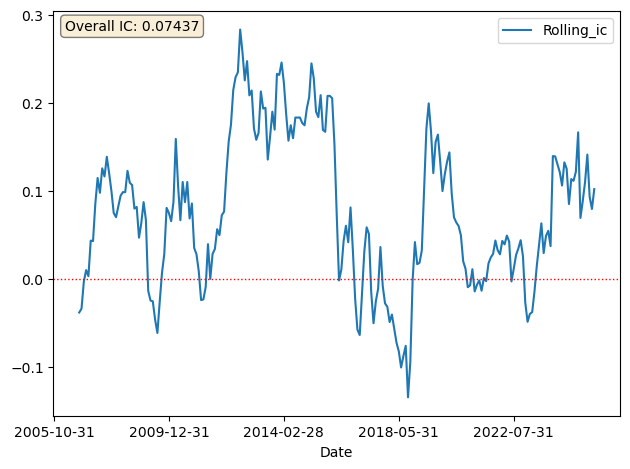

In [52]:
Ave_returns.loc[0:235].plot(x='Date',y=['Rolling_ic'])
plt.axhline(y=0, color='red', linestyle=':', linewidth=1)

plt.text(0.02, 0.98, f'Overall IC: {Overall_ic:.5}', 
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

<Axes: xlabel='Date'>

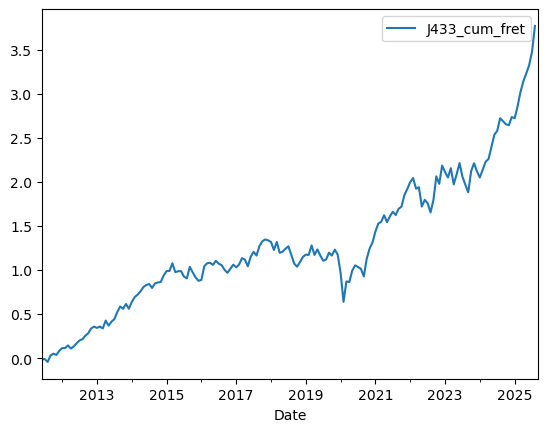

In [19]:
J433 = pd.read_csv(r"C:\Users\B420615\OneDrive - Standard Bank\Py\J433TR.csv")
J433['Date'] = pd.to_datetime(J433['Date'])
J433['J433_ret']= J433['Last Price'].pct_change()
J433['J433_fret'] = J433['J433_ret'].shift(-1)
J433['J433_cum_fret'] = (1+J433['J433_fret']).cumprod()-1
J433.plot(x='Date',y=['J433_cum_fret'])

<Axes: xlabel='Date'>

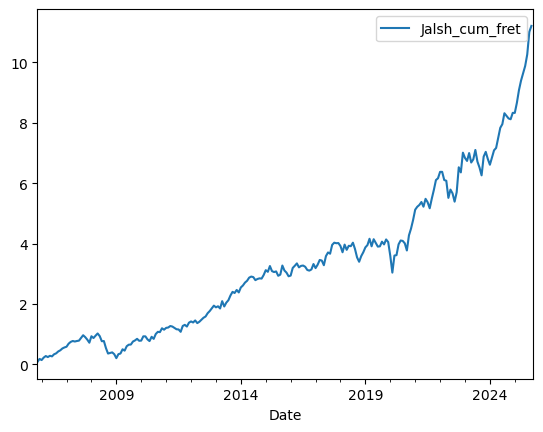

In [53]:
Jalsh = pd.read_csv(r"C:\Users\B420615\OneDrive - Standard Bank\Py\JalshTR.csv")
Jalsh['Date'] = pd.to_datetime(Jalsh['Date'])
Jalsh['Jalsh_ret']= Jalsh['Last Price'].pct_change()
Jalsh['Jalsh_fret'] = Jalsh['Jalsh_ret'].shift(-1)
Jalsh['Jalsh_cum_fret'] = (1+Jalsh['Jalsh_fret']).cumprod()-1
Jalsh.plot(x='Date',y=['Jalsh_cum_fret'])